<a href="https://colab.research.google.com/github/kelvin19-dev/ML/blob/main/Forecasting_Automation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Amazon (AMZN) Stock Price prediction using Facebook Prophet 

In [ ]:
## Switch to GPU mode for faster Computation (Runtime> Change runtime> GPU)

## Importing all the necessary Libraries

In [ ]:
#Necessary libraries = Pandas, fbprophet and plotly

#pandas= data Manipulation and analysis
#fbprophet = Forecasting
#plotly= data visualization


In [ ]:
import pandas as pd
import plotly.express as px
from fbprophet import Prophet

In [ ]:
 #Initializing Plotly
import plotly.io as pio 
pio.renderers.default = 'colab'

## Importing the Dataset & Exploring it

In [ ]:
df = pd.read_csv("AMZN.csv")


In [ ]:
#read_csv function from pandas

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-02-16,3254.050049,3308.300049,3253.590088,3268.949951,3268.949951,2574700
1,2021-02-17,3263.600098,3320.909912,3259.500000,3308.639893,3308.639893,3297500
2,2021-02-18,3282.419922,3338.000000,3273.939941,3328.229980,3328.229980,3027400
3,2021-02-19,3328.229980,3333.500000,3245.750000,3249.899902,3249.899902,4305200
4,2021-02-22,3208.129883,3232.320068,3172.260010,3180.739990,3180.739990,3515700


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,3330.873735,3365.181943,3293.679247,3328.156789,3328.156789,3.454088e+06
std,182.088841,181.265258,186.310593,184.448767,184.448767,1.409673e+06
min,2780.000000,2872.000000,2707.040039,2776.909912,2776.909912,1.680300e+06
25%,3215.007507,3253.110046,3198.762574,3223.887451,3223.887451,2.569525e+06
50%,3344.310059,3370.694946,3303.949951,3338.214966,3338.214966,3.157300e+06
75%,3452.164978,3483.845032,3415.632507,3448.374939,3448.374939,3.885700e+06
max,3744.000000,3773.080078,3696.790039,3731.409912,3731.409912,1.264050e+07


# Data Visualization using plotly express- Visualizing the historical performance of Tesla

In [ ]:
#Line graph, Area graph , box plot (Analyzing price and volume)

In [ ]:
px.area(df, x = 'Date', y = 'Close')

In [ ]:
px.line(df, x = 'Date', y = 'Close')

In [ ]:
px.area(df, x = 'Date', y = 'Volume')

In [ ]:
px.bar(df, y='Volume')

In [ ]:
px.box(df, y='Close')

# Understanding Facebook Prophet

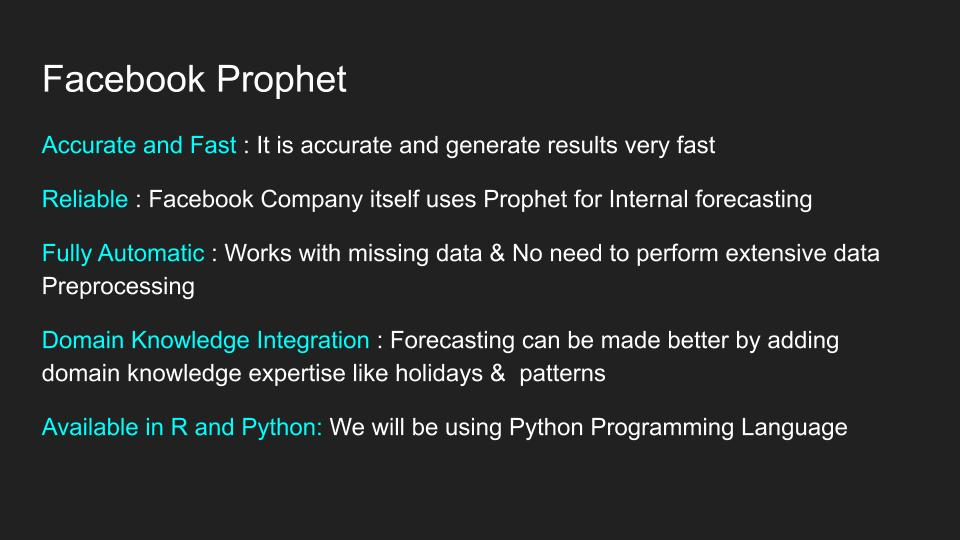

## Data Preperation

In [ ]:
columns = ['Date', 'Close']
ndf = pd.DataFrame(df, columns=columns)

In [ ]:
ndf.head()

,Date,Close
0,2021-02-16,3268.949951
1,2021-02-17,3308.639893
2,2021-02-18,3328.229980
3,2021-02-19,3249.899902
4,2021-02-22,3180.739990


In [ ]:
prophet_df = ndf.rename(columns={'Date':"ds", 'Close':'y'})

In [ ]:
prophet_df.head()

,ds,y
0,2021-02-16,3268.949951
1,2021-02-17,3308.639893
2,2021-02-18,3328.229980
3,2021-02-19,3249.899902
4,2021-02-22,3180.739990


## Creating Facebook Prophet Model

In [ ]:
m = Prophet()
m.fit(prophet_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##Forecasting

In [ ]:
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)

In [ ]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-02-16,3119.269025,2918.390906,3257.591810,3119.269025,3119.269025,-21.388556,-21.388556,-21.388556,-21.388556,-21.388556,-21.388556,0.0,0.0,0.0,3097.880469
1,2021-02-17,3121.829045,2942.182094,3264.798065,3121.829045,3121.829045,-23.742317,-23.742317,-23.742317,-23.742317,-23.742317,-23.742317,0.0,0.0,0.0,3098.086728
2,2021-02-18,3124.389065,2929.723246,3252.188098,3124.389065,3124.389065,-31.475415,-31.475415,-31.475415,-31.475415,-31.475415,-31.475415,0.0,0.0,0.0,3092.913651
3,2021-02-19,3126.949085,2939.098343,3257.720569,3126.949085,3126.949085,-33.545644,-33.545644,-33.545644,-33.545644,-33.545644,-33.545644,0.0,0.0,0.0,3093.403441
4,2021-02-22,3134.629146,2935.457612,3275.536023,3134.629146,3134.629146,-34.902135,-34.902135,-34.902135,-34.902135,-34.902135,-34.902135,0.0,0.0,0.0,3099.727011


In [ ]:
px.line(forecast, x='ds', y='yhat')

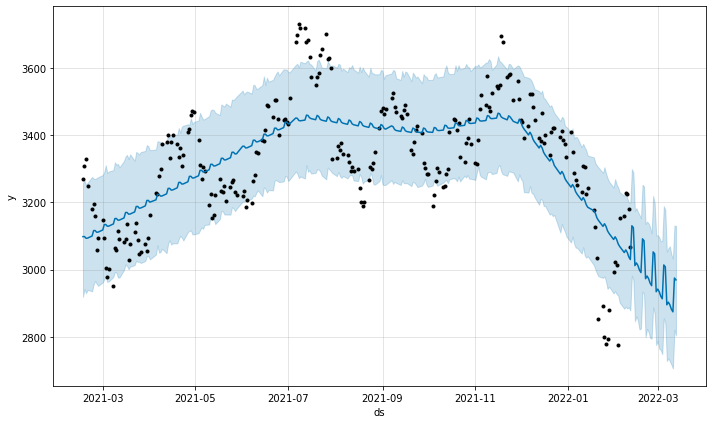

In [ ]:
figure = m.plot(forecast, xlabel='ds', ylabel='y')

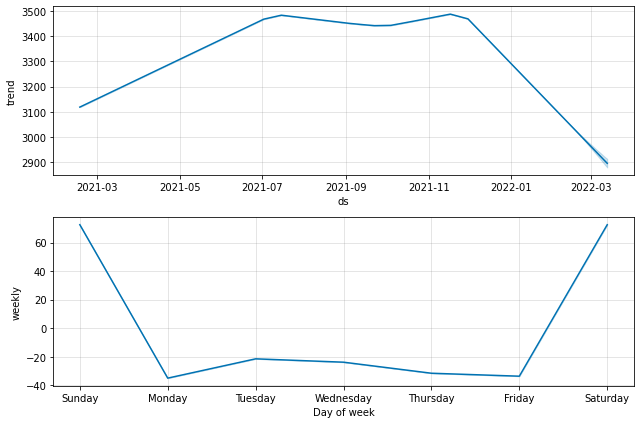

In [ ]:
figure2 = m.plot_components(forecast)

##Downloading the Forecast data

In [ ]:
from google.colab import files
forecast.to_csv('forecast.csv')
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>